In [10]:
import os
import cv2

# Define the path to your dataset folder
dataset_dir = 'C:\\Users\\nidhi\\Desktop\\Data\\Dataset'

# Define the target size for resizing
target_size = (64, 64)


# Loop through the subfolders (classes) in the dataset directory
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    
    # Loop through the image files in each class folder
    for filename in os.listdir(class_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # You can extend this list to include other image formats
            image_path = os.path.join(class_path, filename)
            
            # Read and resize the image
            image = cv2.imread(image_path)
            if image is not None:
                resized_image = cv2.resize(image, target_size)
                
                # Overwrite the original image with the resized one
                cv2.imwrite(image_path, resized_image)

In [11]:
import os
import shutil
import random

# Define paths
data_dir = "C:\\Users\\nidhi\\Desktop\\Data\\Dataset"
train_dir = "C:\\Users\\nidhi\\Desktop\\Data\\train"
val_dir = "C:\\Users\\nidhi\\Desktop\\Data\\validation"
test_dir = "C:\\Users\\nidhi\\Desktop\\Data\\test"

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the split ratios (e.g., 60% train, 20% validation, 20% test)
train_ratio = 0.60
val_ratio = 0.20
test_ratio = 0.20

# List all subfolders (assuming each subfolder represents a class)
subfolders = os.listdir(data_dir)

# Iterate through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(data_dir, subfolder)
    
    # List all files in the subfolder
    file_list = os.listdir(subfolder_path)
    random.shuffle(file_list)

    # Calculate the number of samples for each split
    total_samples = len(file_list)
    train_samples = int(train_ratio * total_samples)
    val_samples = int(val_ratio * total_samples)

    # Split the dataset
    train_files = file_list[:train_samples]
    val_files = file_list[train_samples:train_samples + val_samples]
    test_files = file_list[train_samples + val_samples:]

    # Create subdirectories in train, validation, and test directories
    subfolder_train_dir = os.path.join(train_dir, subfolder)
    subfolder_val_dir = os.path.join(val_dir, subfolder)
    subfolder_test_dir = os.path.join(test_dir, subfolder)
    
    os.makedirs(subfolder_train_dir, exist_ok=True)
    os.makedirs(subfolder_val_dir, exist_ok=True)
    os.makedirs(subfolder_test_dir, exist_ok=True)

    # Move the files to their respective subdirectories
    for file in train_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(subfolder_train_dir, file)
        shutil.copy(src, dst)

    for file in val_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(subfolder_val_dir, file)
        shutil.copy(src, dst)

    for file in test_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(subfolder_test_dir, file)
        shutil.copy(src, dst)

9/9 [==============================] - 0s 9ms/step
Iteration 1: Validation Accuracy = 0.3268
Epoch 1/10
6/6 [==============================] - 1s 26ms/step - loss: 382.7121 - accuracy: 0.7861
Epoch 2/10
6/6 [==============================] - 0s 27ms/step - loss: 330.5853 - accuracy: 0.9364
Epoch 3/10
6/6 [==============================] - 0s 27ms/step - loss: 152.9091 - accuracy: 0.9364
Epoch 4/10
6/6 [==============================] - 0s 28ms/step - loss: 39.1441 - accuracy: 0.8960
Epoch 5/10
6/6 [==============================] - 0s 27ms/step - loss: 6.7351 - accuracy: 0.9595
Epoch 6/10
6/6 [==============================] - 0s 27ms/step - loss: 14.7432 - accuracy: 0.9364
Epoch 7/10
6/6 [==============================] - 0s 27ms/step - loss: 1.4095 - accuracy: 0.9538
Epoch 8/10
6/6 [==============================] - 0s 28ms/step - loss: 1.1561 - accuracy: 0.9884
Epoch 9/10
6/6 [==============================] - 0s 28ms/step - loss: 1.2156 - accuracy: 0.9884
Epoch 10/10
9/9 [=========

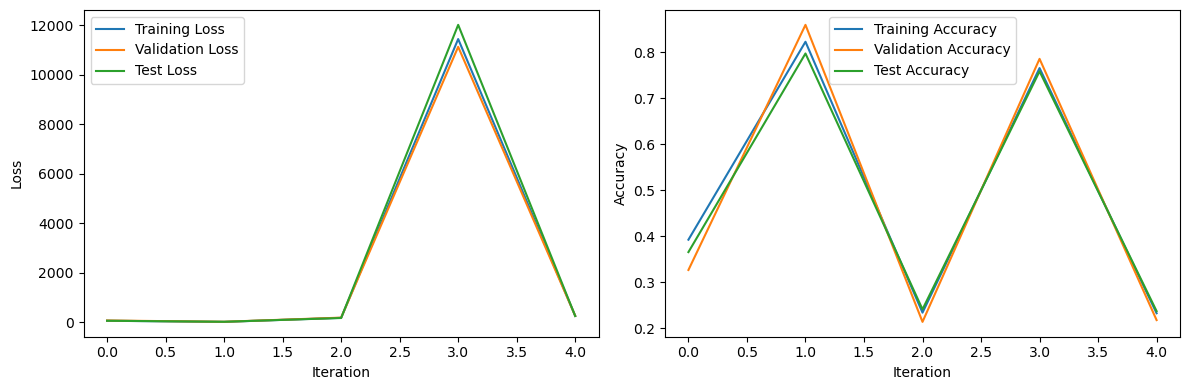

In [20]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Define the architecture of each node
def create_node_model(input_shape, num_classes):
    model = keras.Sequential([
        Flatten(input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load your dataset and preprocess it
data_dir = 'C:\\Users\\nidhi\\Desktop\\Data\\Dataset'
data = []
labels = []
class_names = os.listdir(data_dir)

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            img = keras.preprocessing.image.load_img(
                os.path.join(class_dir, filename),
                target_size=(64, 64)
            )
            img_array = keras.preprocessing.image.img_to_array(img)
            data.append(img_array)
            labels.append(class_name)

data = np.array(data)
labels = np.array(labels)

# Encode class labels into numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create the root node model
root_node_model = create_node_model(input_shape=(64, 64, 3), num_classes=len(class_names))

# Lists to collect metrics
train_losses = []
val_losses = []
test_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Pseudo-code for adding child nodes with a stopping condition
max_iterations = 5  # Define the maximum number of iterations
min_accuracy_threshold = 0.95  # Define a minimum accuracy threshold
iteration = 0

while iteration < max_iterations:
    # Make predictions using the root node model
    root_node_predictions = root_node_model.predict(X_train), root_node_model.predict(X_val), root_node_model.predict(X_test)
    
    # Calculate losses and accuracies
    train_loss = root_node_model.evaluate(X_train, keras.utils.to_categorical(y_train, len(class_names)), verbose=0)[0]
    val_loss = root_node_model.evaluate(X_val, keras.utils.to_categorical(y_val, len(class_names)), verbose=0)[0]
    test_loss = root_node_model.evaluate(X_test, keras.utils.to_categorical(y_test, len(class_names)), verbose=0)[0]
    
    train_accuracy = root_node_model.evaluate(X_train, keras.utils.to_categorical(y_train, len(class_names)), verbose=0)[1]
    val_accuracy = root_node_model.evaluate(X_val, keras.utils.to_categorical(y_val, len(class_names)), verbose=0)[1]
    test_accuracy = root_node_model.evaluate(X_test, keras.utils.to_categorical(y_test, len(class_names)), verbose=0)[1]
    
    # Append metrics to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    
    accuracy = val_accuracy
    print(f"Iteration {iteration + 1}: Validation Accuracy = {accuracy:.4f}")
    
    if accuracy >= min_accuracy_threshold:
        # Reached the desired accuracy, exit the loop
        break
    
    if len(misclassified_indices) == 0:
        # No more misclassifications, exit the loop
        break
    
    # Extract misclassified data and labels
    misclassified_indices = np.where(np.argmax(root_node_predictions[1], axis=1) != y_val)[0]
    misclassified_data = X_val[misclassified_indices]
    misclassified_labels = y_val[misclassified_indices]
    
    # Add a child node to correct the misclassifications
    child_node_model = create_node_model(input_shape=(64, 64, 3), num_classes=len(class_names))
    child_node_model.fit(misclassified_data, keras.utils.to_categorical(misclassified_labels, len(class_names)), epochs=10)
    
    # Update the root node model with the new child node
    root_node_model = child_node_model
    
    iteration += 1

# Plot loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:


while iteration < max_iterations and child_nodes_added < max_child_nodes:
    # Make predictions using the root node model
    root_node_predictions = root_node_model.predict(X_val)
    
    # Calculate losses and accuracies
    train_loss = root_node_model.evaluate(X_train, keras.utils.to_categorical(y_train, len(class_names)), verbose=0)[0]
    val_loss = root_node_model.evaluate(X_val, keras.utils.to_categorical(y_val, len(class_names)), verbose=0)[0]
    test_loss = root_node_model.evaluate(X_test, keras.utils.to_categorical(y_test, len(class_names)), verbose=0)[0]
    
    train_accuracy = root_node_model.evaluate(X_train, keras.utils.to_categorical(y_train, len(class_names)), verbose=0)[1]
    val_accuracy = root_node_model.evaluate(X_val, keras.utils.to_categorical(y_val, len(class_names)), verbose=0)[1]
    test_accuracy = root_node_model.evaluate(X_test, keras.utils.to_categorical(y_test, len(class_names)), verbose=0)[1]
    
    # Append metrics to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    
    accuracy = val_accuracy
    print(f"Iteration {iteration + 1}: Validation Accuracy = {accuracy:.4f}")
    
    if accuracy >= min_accuracy_threshold:
        # Reached the desired accuracy, exit the loop
        break
    
    if len(misclassified_indices) == 0:
        # No more misclassifications, exit the loop
        break
    
    # Extract misclassified data and labels
    misclassified_indices = np.where(np.argmax(root_node_predictions, axis=1) != y_val)[0]
    misclassified_data = X_val[misclassified_indices]
    misclassified_labels = y_val[misclassified_indices]
    
    # Add a child node to correct the misclassifications
    child_node_model = create_node_model(input_shape=(64, 64, 3), num_classes=len(class_names))
    child_node_model.fit(misclassified_data, keras.utils.to_categorical(misclassified_labels, len(class_names)), epochs=10)
    
    # Update the root node model with the new child node
    root_node_model = child_node_model
    
    iteration += 1
    child_nodes_added += 1

# ...


9/9 [==============================] - 0s 10ms/step
Iteration 1: Validation Accuracy = 0.7860
Epoch 1/10
2/2 [==============================] - 1s 28ms/step - loss: 5.6744 - accuracy: 0.9273
Epoch 2/10
2/2 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000
E